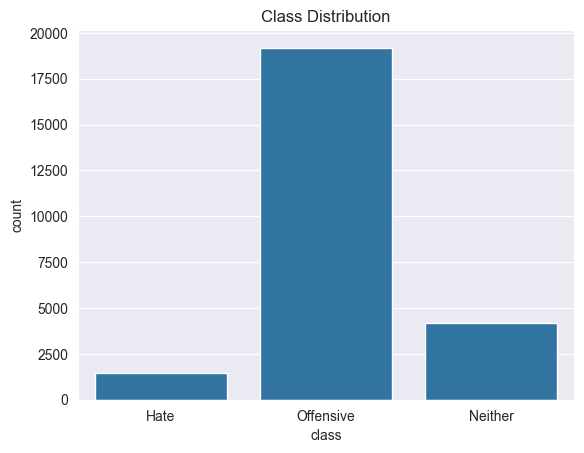

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hate_speech_detection_train.csv")

# Class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=['Hate', 'Offensive', 'Neither'])
plt.show()


In [2]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@[\w]*', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_tweet'] = df['tweet'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_tweet'])
y = df['class']


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.64      0.16      0.26       286
           1       0.91      0.97      0.94      3838
           2       0.84      0.82      0.83       833

    accuracy                           0.90      4957
   macro avg       0.80      0.65      0.67      4957
weighted avg       0.88      0.90      0.88      4957


In [5]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Classification reports
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


SVM Report:
              precision    recall  f1-score   support

           0       0.53      0.24      0.33       286
           1       0.91      0.95      0.93      3838
           2       0.83      0.80      0.82       833

    accuracy                           0.89      4957
   macro avg       0.76      0.67      0.69      4957
weighted avg       0.88      0.89      0.88      4957

Random Forest Report:
              precision    recall  f1-score   support

           0       0.63      0.15      0.25       286
           1       0.92      0.96      0.94      3838
           2       0.83      0.87      0.85       833

    accuracy                           0.90      4957
   macro avg       0.79      0.66      0.68      4957
weighted avg       0.89      0.90      0.88      4957


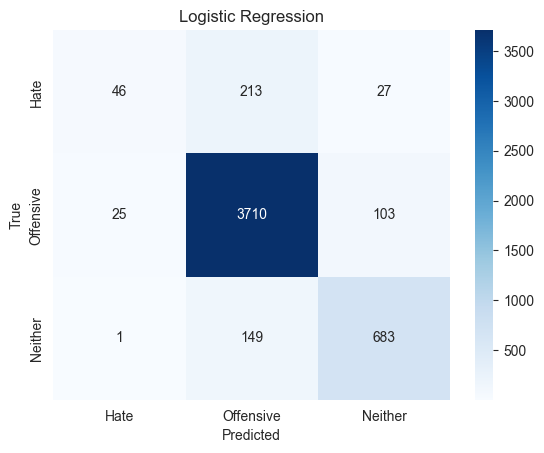

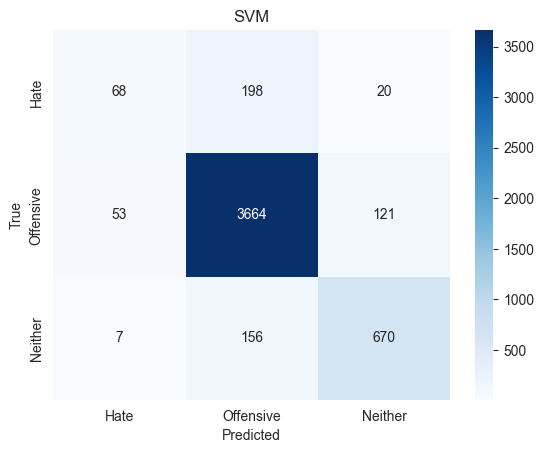

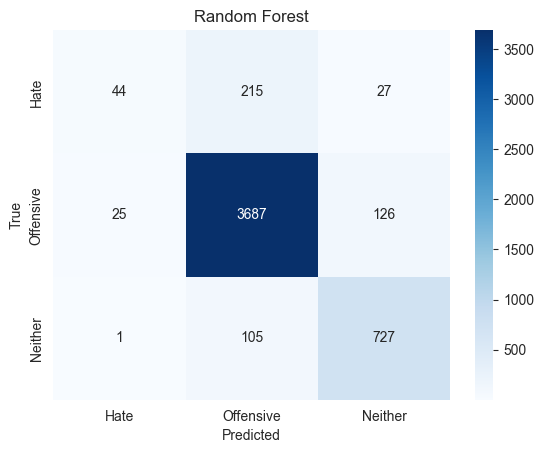

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Hate', 'Offensive', 'Neither'],
                yticklabels=['Hate', 'Offensive', 'Neither'])
    plt.title(title)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_svm, "SVM")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
